### IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### No null values.

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### EXPLORATORY DATA ANALYSIS

#### WHICH COUNTRY HAS THE HIGHEST NUMBER OF EMPLOYEES?

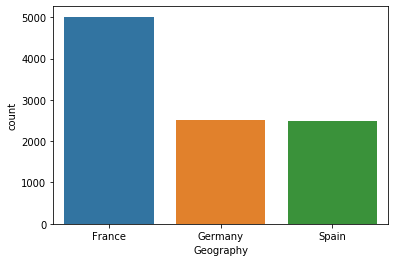

In [7]:
sns.countplot('Geography',data=df, order=df['Geography'].value_counts().index)

#### HOW MANY MEN AND WOMEN ARE WORKING?

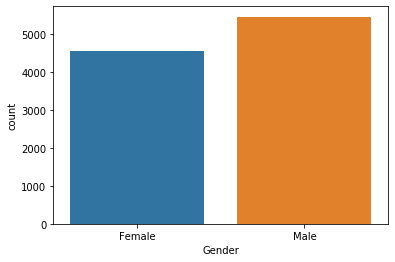

In [8]:
sns.countplot('Gender',data = df)

#### HOW MANY EMPLOYEES HAVE CREDIT CARD?

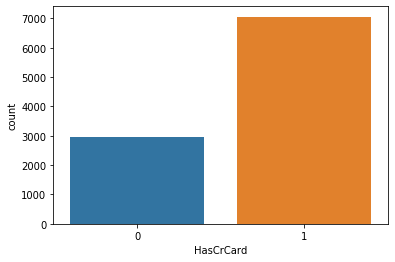

In [9]:
sns.countplot('HasCrCard', data = df)

#### WHAT IS THE EFFECT OF OTHER FEATURES ON EMPLOYEES EXITING?

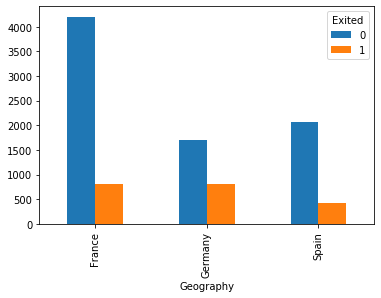

In [10]:
churn_geo = pd.crosstab(df['Geography'],df['Exited'])
churn_geo.plot.bar()

#### The ratio of people from Germany who have exited is more when compared to other  countries

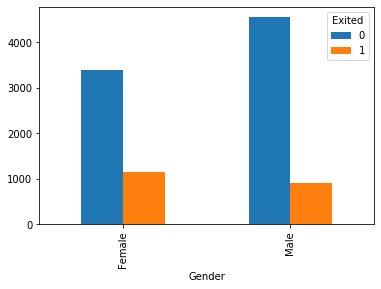

In [11]:
churn_gender = pd.crosstab(df['Gender'],df['Exited'])
churn_gender.plot.bar()

#### Most of the female have exited

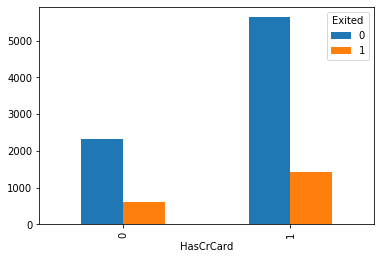

In [12]:
churn_credit = pd.crosstab(df['HasCrCard'],df['Exited'])
churn_credit.plot.bar()

#### People who have have credit card have exited more when compared to people who dont have credit card.

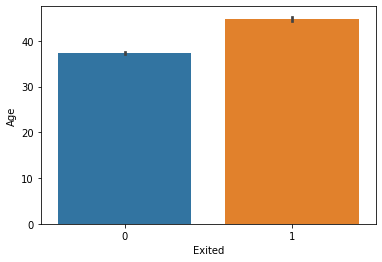

In [13]:
sns.barplot(y = 'Age', x = 'Exited',data = df)

#### People in their 30s and 40s have exited.

#### Most people from Germany who have Credit card and in the age range of 40 have exited.

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.drop(['RowNumber','CustomerId','Surname'],1,inplace = True)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.select_dtypes(object).columns:
    df[i] = le.fit_transform(df[i])

In [17]:
X = df.drop('Exited',1)
y = df['Exited']

In [18]:
# Splitting to train test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

### MODEL BUILDING

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier

### LOGISTIC REGRESSION

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7902857142857143
0.789


In [27]:
y_prob = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

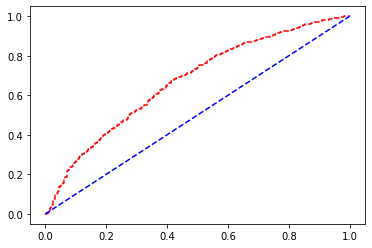

Accuracy Score:  0.789
AUC Score: 0.6705665683517389
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2390
           1       0.39      0.06      0.11       610

    accuracy                           0.79      3000
   macro avg       0.59      0.52      0.50      3000
weighted avg       0.72      0.79      0.72      3000



In [36]:
fpr,tpr,thresh = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,'r--')
plt.plot(fpr,fpr,'b--')
plt.show()
acc = accuracy_score(y_test,y_pred)
print('Accuracy Score: ', acc)
                                    
auc = roc_auc_score(y_test,y_prob)
print('AUC Score:', auc)

print(classification_report(y_test, y_pred))

### DECISION TREE

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.789


In [46]:
y_prob = dt.predict_proba(X_test)[:,1]
y_pred = dt.predict(X_test)

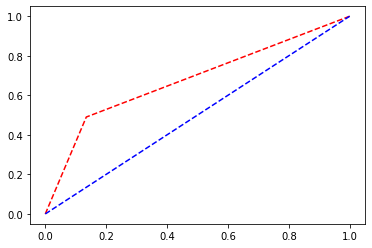

Accuracy Score:  0.789
AUC Score: 0.6777179504767131
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2390
           1       0.48      0.49      0.49       610

    accuracy                           0.79      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000



In [47]:
fpr,tpr,thresh = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,'r--')
plt.plot(fpr,fpr,'b--')
plt.show()
acc = accuracy_score(y_test,y_pred)
print('Accuracy Score: ', acc)
                                    
auc = roc_auc_score(y_test,y_prob)
print('AUC Score:', auc)

print(classification_report(y_test, y_pred))

### K NEAREST NEIGHBOURS

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.8128571428571428
0.762


In [50]:
y_prob = knn.predict_proba(X_test)[:,1]
y_pred = knn.predict(X_test)

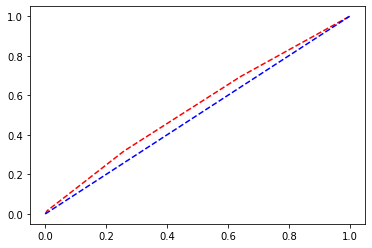

Accuracy Score:  0.762
AUC Score: 0.5398707044378901
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2390
           1       0.25      0.09      0.13       610

    accuracy                           0.76      3000
   macro avg       0.53      0.51      0.50      3000
weighted avg       0.69      0.76      0.71      3000



In [51]:
fpr,tpr,thresh = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,'r--')
plt.plot(fpr,fpr,'b--')
plt.show()
acc = accuracy_score(y_test,y_pred)
print('Accuracy Score: ', acc)
                                    
auc = roc_auc_score(y_test,y_prob)
print('AUC Score:', auc)

print(classification_report(y_test, y_pred))

### NAIVE BAYES

In [52]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
print(nb.score(X_train,y_train))
print(nb.score(X_test,y_test))

0.7834285714285715
0.7793333333333333


In [54]:
y_prob = nb.predict_proba(X_test)[:,1]
y_pred = nb.predict(X_test)

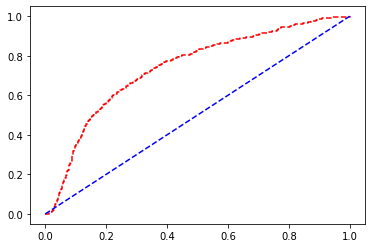

Accuracy Score:  0.7793333333333333
AUC Score: 0.7376994306879758
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2390
           1       0.34      0.09      0.14       610

    accuracy                           0.78      3000
   macro avg       0.57      0.52      0.51      3000
weighted avg       0.71      0.78      0.72      3000



In [55]:
fpr,tpr,thresh = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,'r--')
plt.plot(fpr,fpr,'b--')
plt.show()
acc = accuracy_score(y_test,y_pred)
print('Accuracy Score: ', acc)
                                    
auc = roc_auc_score(y_test,y_prob)
print('AUC Score:', auc)

print(classification_report(y_test, y_pred))

### RANDOM FOREST

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

1.0
0.859


In [58]:
y_prob = rf.predict_proba(X_test)[:,1]
y_pred = rf.predict(X_test)

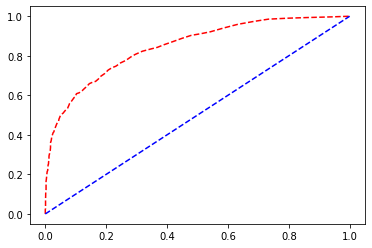

Accuracy Score:  0.859
AUC Score: 0.8467267988202208
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2390
           1       0.75      0.46      0.57       610

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



In [59]:
fpr,tpr,thresh = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,'r--')
plt.plot(fpr,fpr,'b--')
plt.show()
acc = accuracy_score(y_test,y_pred)
print('Accuracy Score: ', acc)
                                    
auc = roc_auc_score(y_test,y_prob)
print('AUC Score:', auc)

print(classification_report(y_test, y_pred))

### ENSEMBLE TECHNIQUES

### VOTING CLASSIFIER

In [60]:
print('Logistic model score: ',model.score(X_test, y_test))
print('Decision Tree model score: ',dt.score(X_test, y_test))
print('KNN model score: ',knn.score(X_test, y_test))
print('Naive Bayes model score: ',nb.score(X_test, y_test))
print('Random model score: ',rf.score(X_test, y_test))

Logistic model score:  0.789
Decision Tree model score:  0.789
KNN model score:  0.762
Naive Bayes model score:  0.7793333333333333
Random model score:  0.859


In [61]:
from sklearn.ensemble import VotingClassifier

estimators = [('lr',model),('dt',dt),('knn',knn),('nb',nb),('rf',rf)]

vc = VotingClassifier(estimators, voting = 'hard')
vc.fit(X_train, y_train)
vc.score(X_test, y_test)

0.8083333333333333

### ADA BOOST WITH DECISION TREE 

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.08,
        n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [63]:
print(ada_clf.score(X_train, y_train))
print(ada_clf.score(X_test, y_test))

1.0
0.7883333333333333


### ADABOOST WITH RANDON FOREST

In [64]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.08,
        n_estimators=10, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [65]:
print(ada_clf.score(X_train, y_train))
print(ada_clf.score(X_test, y_test))

1.0
0.8616666666666667


### GRADIENT BOOSTING

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
boost_reg = GradientBoostingClassifier(n_estimators=50,
                                      random_state=3)
print(boost_reg.fit(X_train, y_train))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [69]:
print(boost_reg.score(X_train, y_train))
print(boost_reg.score(X_test, y_test))

0.8668571428571429
0.862


In [70]:
y_prob = boost_reg.predict_proba(X_test)[:,1]
y_pred = boost_reg.predict(X_test)

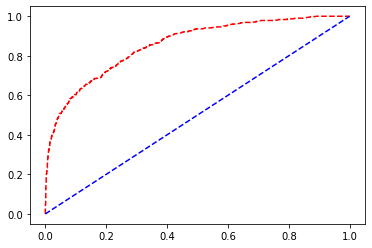

Accuracy Score:  0.862
AUC Score: 0.8564953014610056
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2390
           1       0.78      0.45      0.57       610

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



In [71]:
fpr,tpr,thresh = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,'r--')
plt.plot(fpr,fpr,'b--')
plt.show()
acc = accuracy_score(y_test,y_pred)
print('Accuracy Score: ', acc)
                                    
auc = roc_auc_score(y_test,y_prob)
print('AUC Score:', auc)

print(classification_report(y_test, y_pred))

#### We can increase the f1 score by adding more data and applying feature selection. 